In [309]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [392]:
waste_day=pd.read_csv("waste/0_1_waste_01_21.csv", encoding='cp949')
waste_day.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,전체,261032,277533,303029,311666,299023,328954,346669,368891,366921,...,394496,393116,401658,418214,429128,429531,446102,497238,534055,540780
1,생활계폐기물,48499,49902,50737,50007,48398,48844,50346,52072,50906,...,48990,48728,49915,51247,53772,53490,56035,57961,61597,62178
2,사업장배출시설계폐기물및건설폐기물,204428,219646,244310,253507,241991,270084,286812,307225,306955,...,333019,331981,338571,353565,361573,361136,374678,423721,457134,462221
3,지정폐기물,8105,7985,7982,8152,8634,10026,9511,9594,9060,...,12487,12407,13172,13402,13783,14905,15389,15556,15324,16381


In [393]:
waste_day=waste_day.transpose()
waste_day.head()

,0,1,2,3
Unnamed: 0,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
2001,261032,48499,204428,8105
2002,277533,49902,219646,7985
2003,303029,50737,244310,7982
2004,311666,50007,253507,8152


In [394]:
waste_day.rename(columns=waste_day.iloc[0],inplace=True)
waste_day=waste_day.drop(waste_day.index[0])
waste_day.head()

,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
2001,261032,48499,204428,8105
2002,277533,49902,219646,7985
2003,303029,50737,244310,7982
2004,311666,50007,253507,8152
2005,299023,48398,241991,8634


In [395]:
waste_day[['전체','생활계폐기물','사업장배출시설계폐기물및건설폐기물','지정폐기물']]=waste_day[['전체','생활계폐기물','사업장배출시설계폐기물및건설폐기물','지정폐기물']].astype(float)

In [396]:
waste_day=waste_day.reset_index()
waste_day.head()

,index,전체,생활계폐기물,사업장배출시설계폐기물및건설폐기물,지정폐기물
0,2001,261032.0,48499.0,204428.0,8105.0
1,2002,277533.0,49902.0,219646.0,7985.0
2,2003,303029.0,50737.0,244310.0,7982.0
3,2004,311666.0,50007.0,253507.0,8152.0
4,2005,299023.0,48398.0,241991.0,8634.0


In [397]:
waste_day=waste_day.rename(columns={'index':'년도','사업장배출시설계폐기물및건설폐기물':'사업장_건설폐기물','지정폐기물발생량':'지정폐기물'})
waste_day.tail()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물
16,2017,429531.0,53490.0,361136.0,14905.0
17,2018,446102.0,56035.0,374678.0,15389.0
18,2019,497238.0,57961.0,423721.0,15556.0
19,2020,534055.0,61597.0,457134.0,15324.0
20,2021,540780.0,62178.0,462221.0,16381.0


In [398]:
waste_day['total_pct']=waste_day['전체'].pct_change()*100
waste_day['domestic_pct']=waste_day['생활계폐기물'].pct_change()*100
waste_day['biz_pct']=waste_day['사업장_건설폐기물'].pct_change()*100
waste_day['designated_pct']=waste_day['지정폐기물'].pct_change()*100
waste_day

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659
5,2006,328954.0,48844.0,270084.0,10026.0,10.009598,0.921526,11.609109,16.122307
6,2007,346669.0,50346.0,286812.0,9511.0,5.385251,3.075096,6.193629,-5.136645
7,2008,368891.0,52072.0,307225.0,9594.0,6.410149,3.428276,7.117206,0.872674
8,2009,366921.0,50906.0,306955.0,9060.0,-0.534033,-2.239207,-0.087883,-5.565979
9,2010,374642.0,49159.0,315995.0,9488.0,2.104268,-3.431816,2.945057,4.724062


In [399]:
waste_day['전체'].max()

540780.0

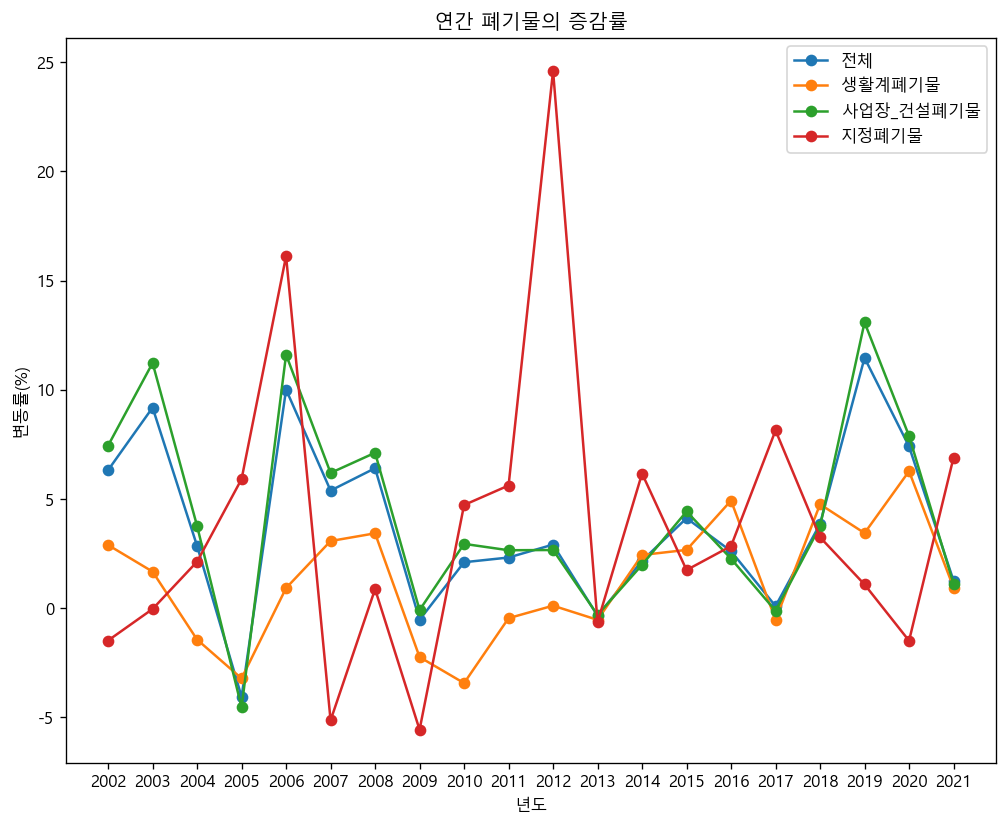

In [400]:
plt.figure(figsize=(10, 8))


plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['total_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['domestic_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['biz_pct'], marker='o')
plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['designated_pct'], marker='o')
plt.legend(['전체', '생활계폐기물', '사업장_건설폐기물','지정폐기물'])
plt.xlabel('년도')
plt.ylabel('변동률(%)')
plt.title('연간 폐기물의 증감률')
plt.grid(False)
plt.show()

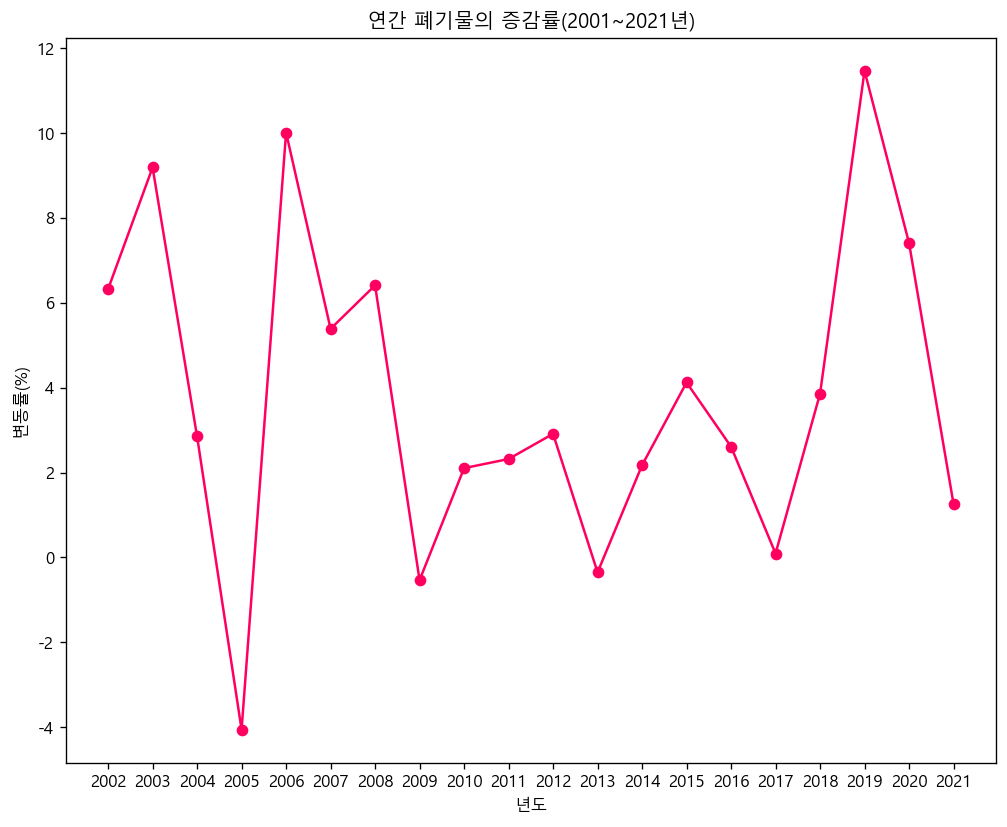

In [401]:
plt.figure(figsize=(10, 8))


plt.plot(waste_day.loc[1:]['년도'], waste_day.loc[1:]['total_pct'], marker='o', color='#FF0060')

plt.xlabel('년도')
plt.ylabel('변동률(%)')
plt.title('연간 폐기물의 증감률(2001~2021년)')
plt.grid(False)
plt.show()

In [402]:
# 총인구 기준
population=pd.read_csv("waste/8_population_01_21.csv", encoding='cp949')
population.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,총인구,47370164.00,47644736.00,47892330.00,48082519.0,48184561.00,48438292.00,48683638.00,49054708.00,49307835.00,...,50199853.00,50428893.00,50746659.00,51014947.00,51217803.0,51361911.00,51585058.00,51764822.00,51836239.00,51744876.00
1,인구성장률,0.77,0.58,0.52,0.4,0.21,0.53,0.51,0.76,0.51,...,0.53,0.46,0.63,0.53,0.4,0.28,0.43,0.35,0.14,-0.18
2,자연증가,6.60,5.20,5.10,4.8,4.00,4.20,5.10,4.40,4.00,...,4.30,3.40,3.30,3.20,2.5,1.40,0.50,0.10,-0.60,-1.10


In [321]:
population=population.transpose()

In [322]:
population.rename(columns=population.iloc[0],inplace=True)
population=population.drop(population.index[0])

In [323]:
population[['총인구','인구성장률','자연증가']]=population[['총인구','인구성장률','자연증가']].astype(float)
population.head()

,총인구,인구성장률,자연증가
2001,47370164.0,0.77,6.6
2002,47644736.0,0.58,5.2
2003,47892330.0,0.52,5.1
2004,48082519.0,0.40,4.8
2005,48184561.0,0.21,4.0


In [324]:
population=population.reset_index()

In [325]:
population=population.rename(columns={'index':'년도'})

In [326]:
waste_day=pd.merge(waste_day, population, how='left', on='년도')
waste_day.head()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct,총인구,인구성장률,자연증가
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN,47370164.0,0.77,6.6
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568,47644736.0,0.58,5.2
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570,47892330.0,0.52,5.1
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792,48082519.0,0.40,4.8
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659,48184561.0,0.21,4.0


In [327]:
#폐기물 배출량과 총인구의 상관계수
waste_day[['전체','총인구']].corr()

,전체,총인구
전체,1.000000,0.948203
총인구,0.948203,1.000000


In [328]:
import scipy.stats as ss

In [329]:
#폐기물 배출량과 총인구의 유의확률.
#유의확률이 0.05 미만이므로 두 변수의 상관관계가 통계적으로 유의함
ss.pearsonr(waste_day['전체'], waste_day['총인구'])

(0.9482028903144749, 6.532561470417734e-11)

In [330]:
growth=pd.read_csv("waste/12_economic_growth_rate_01_21.csv", encoding='cp949')
growth.head()

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,경제성장률,4.9,7.7,3.1,5.2,4.3,5.3,5.8,3,0.8,...,2.4,3.2,3.2,2.8,2.9,3.2,2.9,2.2,-0.7,4.3


In [331]:
growth=growth.transpose()
growth.head()

,0
Unnamed: 0,경제성장률
2001,4.9
2002,7.7
2003,3.1
2004,5.2


In [332]:
growth=growth.iloc[1:]
growth.head()

,0
2001,4.9
2002,7.7
2003,3.1
2004,5.2
2005,4.3


In [333]:
growth=growth.rename(columns={0:'경제성장률'})

In [334]:
growth.head()

,경제성장률
2001,4.9
2002,7.7
2003,3.1
2004,5.2
2005,4.3


In [335]:
growth=growth.reset_index(drop=False)


In [336]:
growth=growth.rename(columns={'index':'년도'})
growth.head()

,년도,경제성장률
0,2001,4.9
1,2002,7.7
2,2003,3.1
3,2004,5.2
4,2005,4.3


In [337]:
waste_day=pd.merge(waste_day, growth, how='left', on='년도')
waste_day.head()

,년도,전체,생활계폐기물,사업장_건설폐기물,지정폐기물,total_pct,domestic_pct,biz_pct,designated_pct,총인구,인구성장률,자연증가,경제성장률
0,2001,261032.0,48499.0,204428.0,8105.0,NaN,NaN,NaN,NaN,47370164.0,0.77,6.6,4.9
1,2002,277533.0,49902.0,219646.0,7985.0,6.321447,2.892843,7.444186,-1.480568,47644736.0,0.58,5.2,7.7
2,2003,303029.0,50737.0,244310.0,7982.0,9.186655,1.673280,11.228978,-0.037570,47892330.0,0.52,5.1,3.1
3,2004,311666.0,50007.0,253507.0,8152.0,2.850222,-1.438792,3.764480,2.129792,48082519.0,0.40,4.8,5.2
4,2005,299023.0,48398.0,241991.0,8634.0,-4.056586,-3.217550,-4.542675,5.912659,48184561.0,0.21,4.0,4.3


In [338]:
#폐기물 배출량과 경제성장률의 유의확률.
#유의확률이 0.05 미만이므로 두 변수의 상관관계가 통계적으로 유의함
ss.pearsonr(waste_day['전체'], waste_day['경제성장률'])

(-0.5839744028050158, 0.005443565508519392)

In [339]:
#한글깨짐

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

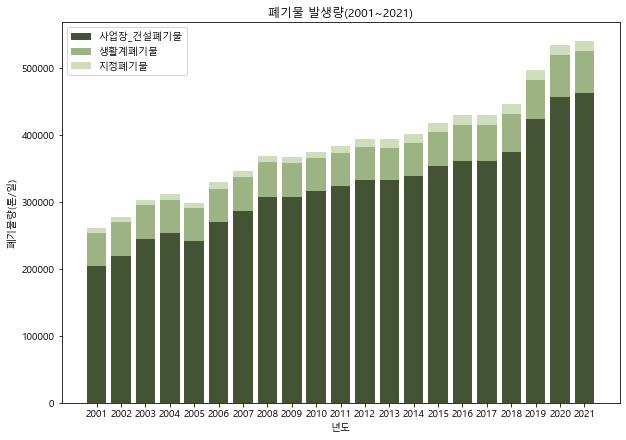

In [340]:
## 폐기물 종류별 연간 폐기물량

plt.figure(figsize=(10, 7))
plt.bar(waste_day['년도'],waste_day['사업장_건설폐기물'],label='사업장_건설폐기물', color="#435334")
plt.bar(waste_day['년도'],waste_day['생활계폐기물'], bottom=waste_day['사업장_건설폐기물'], label='생활계폐기물', color="#9EB384")
plt.bar(waste_day['년도'],waste_day['지정폐기물'], bottom=waste_day['생활계폐기물']+waste_day['사업장_건설폐기물'], label='지정폐기물', color="#CEDEBD")
plt.xlabel('년도')
plt.ylabel('폐기물량(톤/일)')
plt.legend()
plt.title('폐기물 발생량(2001~2021)')
plt.show()

In [341]:
waste_day.iloc[20, 2:]

생활계폐기물               62178.0
사업장_건설폐기물           462221.0
지정폐기물                16381.0
total_pct           1.259234
domestic_pct        0.943228
biz_pct             1.112803
designated_pct      6.897677
총인구               51744876.0
인구성장률                  -0.18
자연증가                    -1.1
경제성장률                    4.3
Name: 20, dtype: object

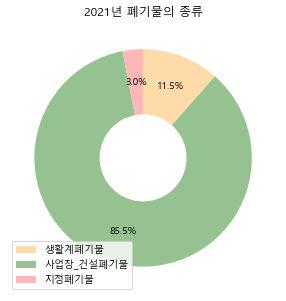

In [342]:
## 2021년 폐기물의 종류

labels = ['생활계폐기물','사업장_건설폐기물','지정폐기물'] ## 라벨
waste_2021 = waste_day.iloc[20, 2:5].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(waste_2021, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFDBAA','#96C291','#FFB7B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 폐기물의 종류")

plt.show()

In [344]:
disposal=pd.read_csv("waste/0_2_waste_disposal_01_21.csv", encoding='cp949')
disposal.tail()

,년도,발생및처리(총계),발생_생활계폐기물,생활계폐기물_1인당발생량(kg/일),발생_사업장배출시설계폐기물,건설폐기물,처리_매립,처리_소각,처리_재활용,처리_기타
16,2017,414626,53490,1.01,164874,196262,32269,24038,358271,48
17,2018,430713,56035,1.06,167727,206951,31533,24132,375006,42
18,2019,481682,57961,1.09,202619,221102,27679,23723,420626,9654
19,2020,518731,61597,1.16,220951,236183,24691,25649,456800,11591
20,2021,524399,62178,1.18,232603,229618,26235,24614,459481,14070


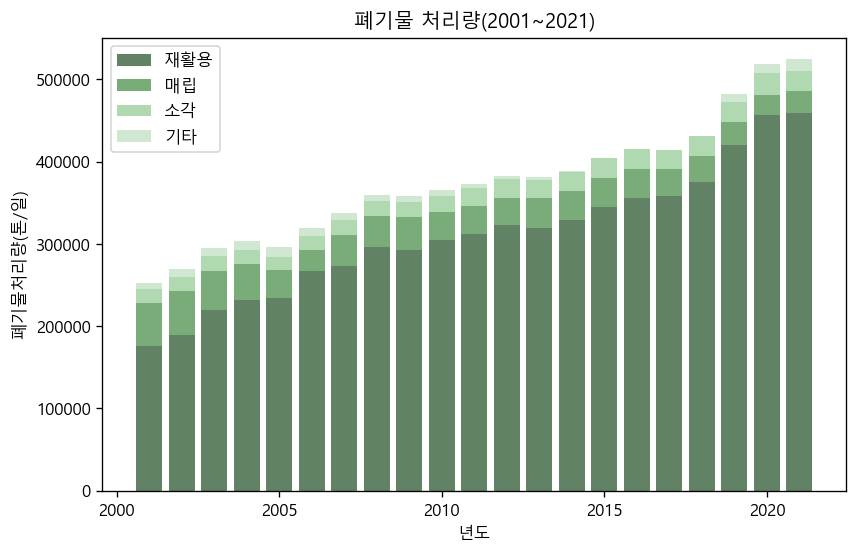

In [345]:
# 폐기물 발생량 및 처리현황(2001~2021년)

plt.figure(figsize=(8, 5))
plt.bar(disposal['년도'],disposal['처리_재활용'],label='재활용', color="#618264")
plt.bar(disposal['년도'],disposal['처리_매립'], bottom=disposal['처리_재활용'], label='매립', color="#79AC78")
plt.bar(disposal['년도'],disposal['처리_소각'], bottom=disposal['처리_매립']+disposal['처리_재활용'], label='소각', color="#B0D9B1")
plt.bar(disposal['년도'],disposal['처리_기타'], bottom=disposal['처리_소각']+disposal['처리_매립']+disposal['처리_재활용'], label='기타', color="#D0E7D2")
plt.xlabel('년도')
plt.ylabel('폐기물처리량(톤/일)')
plt.legend()
plt.title('폐기물 처리량(2001~2021)')
plt.show()

In [346]:
disposal['년도']=disposal['년도'].astype(object)

In [347]:
disposal.iloc[0, 6:].to_list

<bound method IndexOpsMixin.tolist of 처리_매립      52436
처리_소각      16876
처리_재활용    175802
처리_기타       7813
Name: 0, dtype: object>

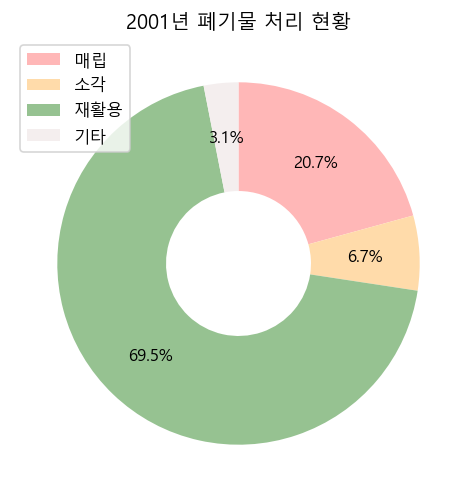

In [348]:
## 2001년 폐기물의 처리 현황(종합)

labels = ['매립','소각','재활용','기타'] ## 라벨
disposal_2001 = disposal.iloc[0, 6:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(disposal_2001, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFB7B7','#FFDBAA','#96C291','#F4EEEE']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2001년 폐기물 처리 현황")

plt.show()

In [349]:
disposal.iloc[20, 6:]
#disposal.iloc[20, 6:].to_list()

처리_매립      26235
처리_소각      24614
처리_재활용    459481
처리_기타      14070
Name: 20, dtype: object

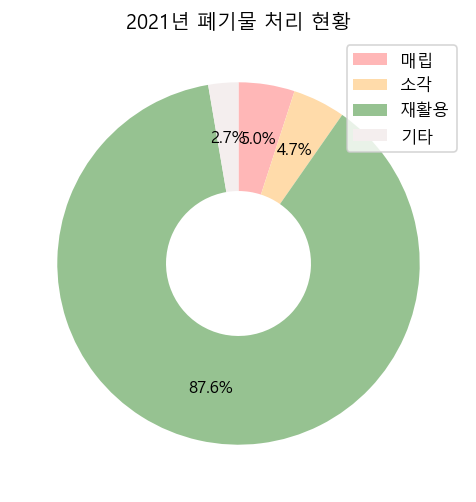

In [350]:
## 2021년 폐기물의 처리 현황(종합)

labels = ['매립','소각','재활용','기타'] ## 라벨
disposal_2021 = disposal.iloc[20, 6:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(disposal_2021, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#FFB7B7','#FFDBAA','#96C291','#F4EEEE']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 폐기물 처리 현황")

plt.show()

In [351]:
disposal_type=pd.read_csv("waste/16_type_of_disposal_21.csv", encoding='cp949')
disposal_type

,폐기물 종류,단위,2021발생량,재활용,소각,매립,기타
0,생활계폐기물,톤/년,22695025.3,12865308.8,5640246.7,2918241.7,1271228.1
1,사업장_건설폐기물,톤/년,111002964.9,105440876.1,1011981.1,3483526.5,1066581.2
2,사업장지정폐기물,톤/년,5761299.7,3903524.4,593314.3,881787.6,382673.4


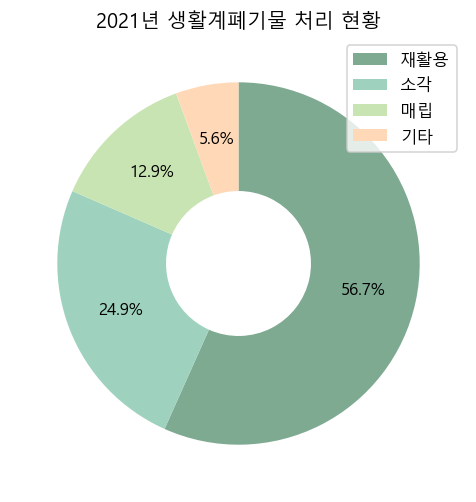

In [352]:
## 2021년 생활계폐기물 처리 현황
labels = ['재활용','소각','매립','기타'] ## 라벨
type1 = disposal_type.iloc[0, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(type1, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 생활계폐기물 처리 현황")

plt.show()

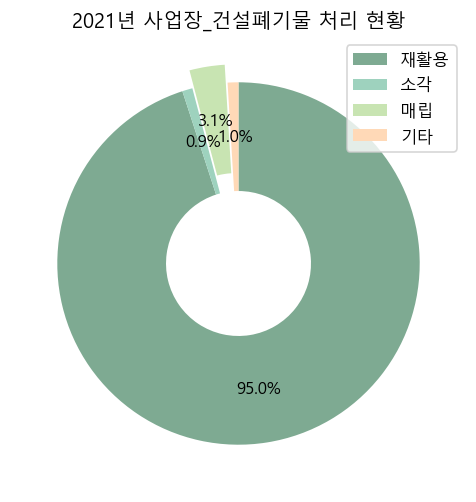

In [353]:
## 2021년 사업장_건설폐기물 처리 현황

labels = ['재활용','소각','매립','기타'] ## 라벨
type2 = disposal_type.iloc[1, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

explode = [0,0,0.1,0]
pie = ax.pie(type2, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       explode=explode,
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 사업장_건설폐기물 처리 현황")

plt.show()

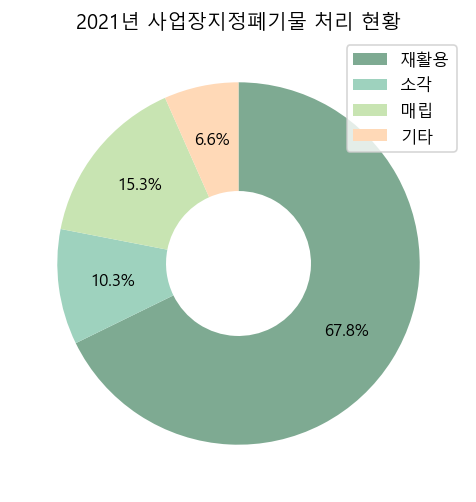

In [354]:
## 2021년 사업자지정폐기물 처리 현황

labels = ['재활용','소각','매립','기타'] ## 라벨
type3 = disposal_type.iloc[2, 3:].to_list() ## 데이터
 
fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(type3, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
       wedgeprops=dict(width=0.6), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       pctdistance=0.7,  ## 퍼센트 위치지정
       colors=['#7EAA92','#9ED2BE','#C8E4B2','#FFD9B7']
        )
 
plt.legend(pie[0],labels) ## 범례 표시

ax.set_title("2021년 사업장지정폐기물 처리 현황")

plt.show()

In [430]:
# 2021년 지역별 생활계폐기물 발생량 및 처리 현황
area_2021=pd.read_csv("waste/17_domestic_by_region_21.csv", encoding='cp949')
area_2021.head()

,시도,시군구,2021발생량(톤/년),재활용,소각,매립,기타
0,서울,종로구,11996.4,0.0,9608.8,2387.6,0.0
1,서울,종로구,7027.8,0.0,5629.1,1398.7,0.0
2,서울,종로구,220.6,0.0,176.7,43.9,0.0
3,서울,종로구,749.7,0.0,600.5,149.2,0.0
4,서울,종로구,920.2,0.0,737.1,183.1,0.0


In [431]:
recycle=area_2021.groupby('시도').agg(waste_sum=('2021발생량(톤/년)','sum'),recycle_sum=('재활용','sum'))

In [432]:
recycle_area=recycle.assign(recycle_rate=recycle['recycle_sum']/recycle['waste_sum']*100)
recycle_area.head()

,waste_sum,recycle_sum,recycle_rate
시도,,,
강원,830246.9,427280.0,51.464209
경기,5472310.9,3355972.7,61.326426
경남,1709497.3,830282.6,48.568816
경북,1434006.6,701591.5,48.925263
광주,567040.6,354101.0,62.447204


In [433]:
recycle_area=recycle_area.sort_values('waste_sum', ascending=False)
recycle_area.head()

,waste_sum,recycle_sum,recycle_rate
시도,,,
경기,5472310.9,3355972.7,61.326426
서울,3961311.4,2220840.9,56.063275
경남,1709497.3,830282.6,48.568816
경북,1434006.6,701591.5,48.925263
인천,1417485.1,774379.1,54.630493


In [434]:
pop_2021=pd.read_csv("waste/18_district_population_21.csv", encoding='cp949')
pop_2021.head()

,시도,시군구,면적(㎢),인구(명),동(읍·면)수 (개소),세대수(가구)
0,서울,종로구,23.91,153789,17,73494
1,서울,중구,9.96,131787,15,63519
2,서울,용산구,21.86,237285,16,111036
3,서울,성동구,16.86,292672,17,134233
4,서울,광진구,17.06,352627,15,167949


In [435]:
pop_area=pop_2021.groupby('시도').agg(population=('인구(명)','sum'),household=('세대수(가구)','sum'))
pop_area.head()

,population,household
시도,,
강원,1555057,745823
경기,13925862,5841995
경남,3374516,1504236
경북,2654158,1263487
광주,1462545,645712


In [436]:
area_all=pd.merge(recycle_area,pop_area, how='left',on='시도')
area_all=area_all.reset_index()
area_all.head()

,시도,waste_sum,recycle_sum,recycle_rate,population,household
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007
2,경남,1709497.3,830282.6,48.568816,3374516,1504236
3,경북,1434006.6,701591.5,48.925263,2654158,1263487
4,인천,1417485.1,774379.1,54.630493,3014347,1298403


In [437]:
area_all=area_all.sort_values('waste_sum', ascending=False)

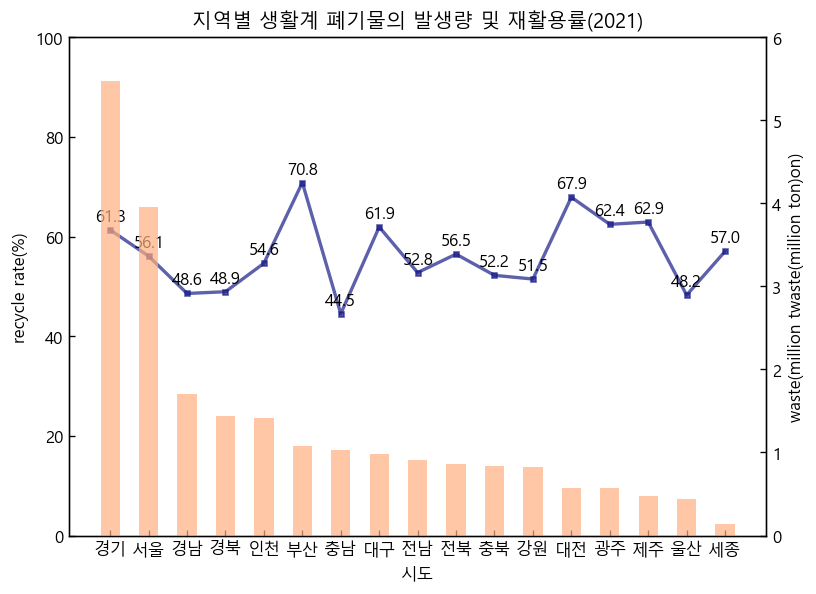

In [445]:
## 2021년 지역별 생활계 폐기물 발생량과 재활용 처리 비율
# 데이터 준비
x = area_all['시도']
y1 = area_all['recycle_rate']
y2 = area_all['waste_sum']/1000000

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 100])
ax1.set_xlabel('시도')
ax1.set_ylabel('recycle rate(%)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='waste', alpha=0.7, width=0.5)
ax2.set_ylim(0, 6)
ax2.set_ylabel('waste(million twaste(million ton)on)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 생활계 폐기물의 발생량 및 재활용률(2021)')

plt.show()

In [446]:
area_all=area_all.sort_values('population', ascending=False)

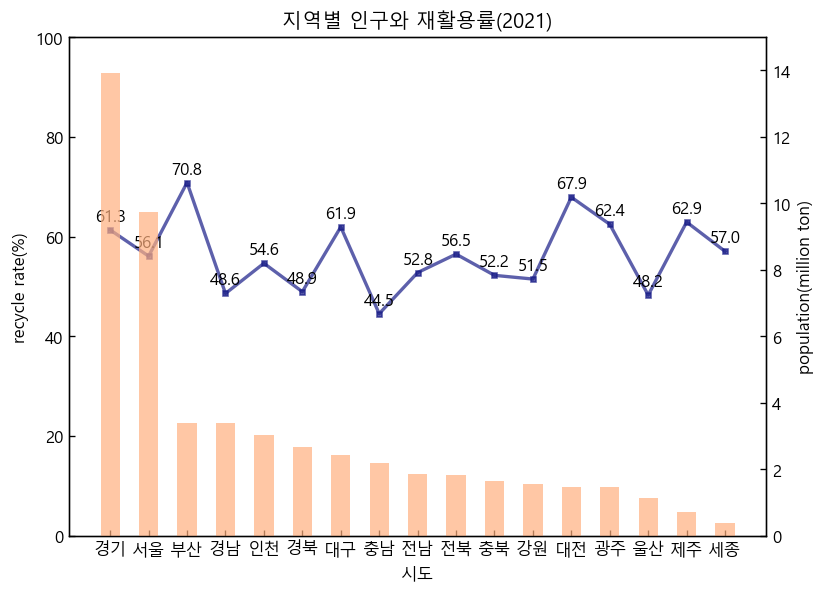

In [448]:
## 2021년 지역별 인구수와 생활계 폐기물의 재활용 처리 비율

# 데이터 준비
x = area_all['시도']
y1 = area_all['recycle_rate']
y2 = area_all['population']/1000000

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 100])
ax1.set_xlabel('시도')
ax1.set_ylabel('recycle rate(%)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='population', alpha=0.7, width=0.5)
ax2.set_ylim(0, 15)
ax2.set_ylabel('population(million ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 인구와 재활용률(2021)')

plt.show()

In [449]:
area_all['waste_sum'].sum()

22695025.3

In [450]:
area_all=area_all.assign(waste_per_day=area_all['waste_sum']/365)
area_all

,시도,waste_sum,recycle_sum,recycle_rate,population,household,waste_per_day
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995,14992.632603
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007,10852.907945
5,부산,1072610.7,759686.5,70.825930,3389800,1544663,2938.659452
2,경남,1709497.3,830282.6,48.568816,3374516,1504236,4683.554247
4,인천,1417485.1,774379.1,54.630493,3014347,1298403,3883.520822
3,경북,1434006.6,701591.5,48.925263,2654158,1263487,3928.785205
7,대구,982873.8,608519.1,61.912231,2436012,1077151,2692.804932
6,충남,1024489.0,455967.0,44.506774,2178765,999872,2806.819178
8,전남,907241.6,478673.5,52.761414,1857404,897210,2485.593425
9,전북,858871.0,484991.1,56.468445,1813740,847073,2353.071233


In [451]:
# 지역별 1인당 일일 생활계폐기물 발생량 
area_all=area_all.assign(waste_head=area_all['waste_per_day']/area_all['population']*1000)
area_all.head()

,시도,waste_sum,recycle_sum,recycle_rate,population,household,waste_per_day,waste_head
0,경기,5472310.9,3355972.7,61.326426,13925862,5841995,14992.632603,1.076604
1,서울,3961311.4,2220840.9,56.063275,9736027,4426007,10852.907945,1.114716
5,부산,1072610.7,759686.5,70.825930,3389800,1544663,2938.659452,0.866912
2,경남,1709497.3,830282.6,48.568816,3374516,1504236,4683.554247,1.387919
4,인천,1417485.1,774379.1,54.630493,3014347,1298403,3883.520822,1.288346


In [452]:
# 생활계폐기물 /생활폐기물관리지역 인구   => 1인당 1일 폐기물 배출량 1.18kg
area_all['waste_per_day'].sum()/(area_all['population'].sum()*1000)

1.1795399154259023e-06

In [453]:
area_all=area_all.sort_values('waste_sum', ascending=False)

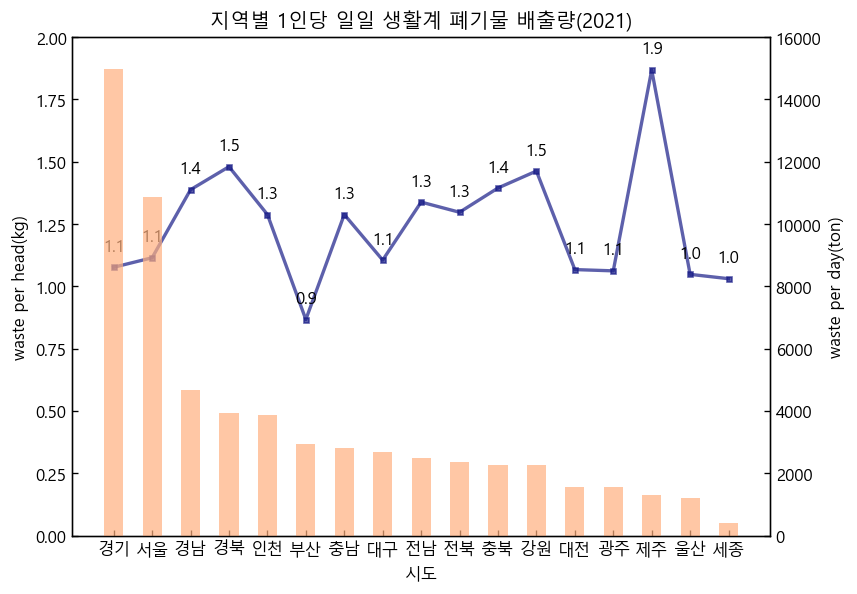

In [456]:
## 2021년 지역별 1인당 일일 생활계 폐기물 배출량

# 데이터 준비
x = area_all['시도']
y1 = area_all['waste_head']
y2 = area_all['waste_per_day']

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='#191D88', markersize=3, linewidth=2, alpha=0.7, label='rate')
ax1.set_ylim([0, 2])
ax1.set_xlabel('시도')
ax1.set_ylabel('waste per head(kg)')
ax1.tick_params(axis='both', direction='in')

for i in range(len(x)):
    height = y1[i]
    plt.text(x[i], height + 0.05, '%.1f' %height, ha='center', va='bottom', size = 10)


ax2 = ax1.twinx()
ax2.bar(x, y2, color='#FFB07F', label='waste', alpha=0.7, width=0.5)
ax2.set_ylim(0, 16000)
ax2.set_ylabel('waste per day(ton)')
ax2.tick_params(axis='y', direction='in')
plt.title('지역별 1인당 일일 생활계 폐기물 배출량(2021)')

plt.show()

In [496]:
# 2001~2021년 OECD 주요국의 1인당 생활폐기물발생량

waste_country=pd.read_csv("waste/19_waste_per_head_OECD_02_18.csv", encoding='cp949')
waste_country.head()

,국가,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,폴란드,275,260,256,319,321,322,320,316,312,315,314,293,268,282,303,312,325
1,일본,425,425,418,413,407,397,376,361,354,355,355,352,348,346,340,339,338
2,체코,279,280,278,289,296,293,305,315,317,320,308,307,310,317,339,489,494
3,한국,382,387,380,367,368,377,387,377,362,358,356,353,359,367,383,380,396
4,튀르키예,470,465,440,458,434,433,400,419,407,416,410,406,405,400,426,425,424


In [497]:
country_2018=waste_country[['국가','2018']].sort_values('2018')
country_2018

,국가,2018
0,폴란드,325
1,일본,338
3,한국,396
4,튀르키예,424
6,영국,463
5,스페인,476
2,체코,494
8,이탈리아,504
11,네덜란드,511
7,그리스,515


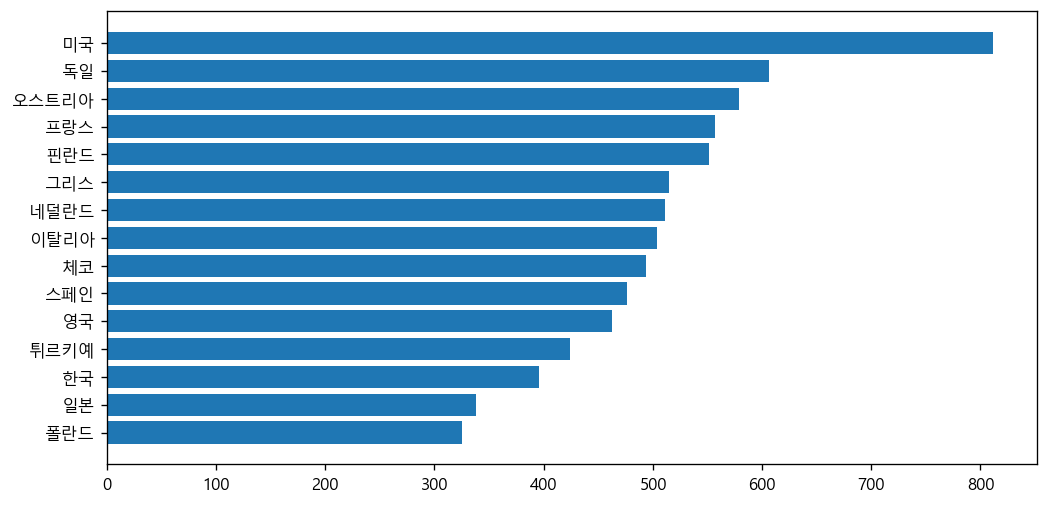

In [498]:
plt.figure(figsize=(10, 5))

y = range(0,15)
country = country_2018['국가']
values = country_2018['2018']

plt.barh(y, values)
plt.yticks(y, country)

plt.show()

In [501]:
plastic_21=pd.read_csv("waste/5_domestic_21.csv", encoding='cp949')
plastic_21.head()

,년도,시도,시군구,폐기물_종류,폐기물_종류.1,폐기물_종류.2,년도_발생량,총계_재활용,총계_소각,총계_매립,...,공공처리_매립,공공처리_기타,자가처리_재활용,자가처리_소각,자가처리_매립,자가처리_기타,위탁처리_재활용,위탁처리_소각,위탁처리_매립,위탁처리_기타
0,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,11996.4,0.0,9608.8,2387.6,...,2387.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,7027.8,0.0,5629.1,1398.7,...,1398.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,220.6,0.0,176.7,43.9,...,43.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,749.7,0.0,600.5,149.2,...,149.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,920.2,0.0,737.1,183.1,...,183.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [508]:
pet=plastic_21[plastic_21['폐기물_종류.2']=='PET병']['년도_발생량'].sum()
pet

185718.99999999997

In [510]:
pet/plastic_21['년도_발생량'].sum()*100

1.1086831358298288

In [511]:
plastic_21.groupby('폐기물_종류.2').agg(waste_ttl=('년도_발생량','sum'))

,waste_ttl
폐기물_종류.2,
PET병,185719.0
건설폐재류(공사장생활폐기물),195182.5
기타,3925306.3
농약용기류,5194.4
발포수지류,62222.9
비닐류,439615.7
연탄재,39982.8
음식물류 폐기물,523535.9
종이팩,16534.5
